In [73]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics 
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics 
from sklearn.metrics import accuracy_score




# ## 1. Data load and cleansing

# loading libraries and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#get_ipython().magic(u'matplotlib inline')
import seaborn as sns
sns.set()

biospecimen1 = pd.read_csv("~/health data/project 1/data/Biospecimen_Analysis_Results.csv")

cols = {} # column names
# Biospecimen Analysis
cols["biospecimen"] = ["PATNO", "CLINICAL_EVENT","TYPE", "TESTNAME", "TESTVALUE", "UNITS"]
# Medical
cols["pd_features"] = ["PATNO", "SXMO","SXYEAR", "PDDXDT"] # first symptom onset month, year, diagnosis date 
cols["pd_medication"] = ["PATNO", "EVENT_ID","PDMEDYN","ONLDOPA", "ONDOPAG", "ONOTHER"] # on medication, Levodopa, Dopamine Agonist, other
cols["vital_sign"] = ["PATNO", "EVENT_ID","WGTKG","HTCM"]
# Medical-Neurological Exam
cols["neuro_cranial"] = ["PATNO", "EVENT_ID","CN1RSP", "CN2RSP", "CN346RSP", "CN5RSP", "CN7RSP", "CN8RSP", "CN910RSP", "CN11RSP", "CN12RSP"]
# Medical-Safety Monitoring

# Motor Assessments
cols["updrs1"] = ["PATNO", "EVENT_ID", "INFODT", "NP1COG", "NP1HALL", "NP1DPRS", "NP1ANXS", "NP1APAT", "NP1DDS"]
cols["updrs1pq"] = ["PATNO", "EVENT_ID", "NP1SLPN", "NP1SLPD", "NP1PAIN", "NP1URIN", "NP1CNST", "NP1LTHD", "NP1FATG"]
cols["updrs2pq"] = ["PATNO", "EVENT_ID", "NP2SPCH", "NP2SALV", "NP2SWAL", "NP2EAT", "NP2DRES", "NP2HYGN", "NP2HWRT", "NP2HOBB", "NP2TURN", "NP2TRMR", "NP2RISE", "NP2WALK", "NP2FREZ"]
cols["updrs3_temp"] = ["PATNO", "EVENT_ID", "PAG_NAME", "CMEDTM", "EXAMTM", "NP3SPCH", "NP3FACXP", "NP3RIGN", "NP3RIGRU", "NP3RIGLU", "PN3RIGRL", "NP3RIGLL", "NP3FTAPR", "NP3FTAPL", "NP3HMOVR", "NP3HMOVL", "NP3PRSPR", "NP3PRSPL", "NP3TTAPR", "NP3TTAPL", "NP3LGAGR", "NP3LGAGL", "NP3RISNG", "NP3GAIT", "NP3FRZGT", "NP3PSTBL", "NP3POSTR", "NP3BRADY", "NP3PTRMR", "NP3PTRML", "NP3KTRMR", "NP3KTRML", "NP3RTARU", "NP3RTALU", "NP3RTARL", "NP3RTALL", "NP3RTALJ", "NP3RTCON", "DYSKPRES", "DYSKIRAT", "NHY", "ANNUAL_TIME_BTW_DOSE_NUPDRS", "ON_OFF_DOSE", "PD_MED_USE"]
cols["updrs3"] = ["PATNO", "EVENT_ID", "NP3SPCH", "NP3FACXP", "NP3RIGN", "NP3RIGRU", "NP3RIGLU", "PN3RIGRL", "NP3RIGLL", "NP3FTAPR", "NP3FTAPL", "NP3HMOVR", "NP3HMOVL", "NP3PRSPR", "NP3PRSPL", "NP3TTAPR", "NP3TTAPL", "NP3LGAGR", "NP3LGAGL", "NP3RISNG", "NP3GAIT", "NP3FRZGT", "NP3PSTBL", "NP3POSTR", "NP3BRADY", "NP3PTRMR", "NP3PTRML", "NP3KTRMR", "NP3KTRML", "NP3RTARU", "NP3RTALU", "NP3RTARL", "NP3RTALL", "NP3RTALJ", "NP3RTCON"]
cols["updrs4"] = ["PATNO", "EVENT_ID", "NP4WDYSK", "NP4DYSKI", "NP4OFF", "NP4FLCTI", "NP4FLCTX", "NP4DYSTN"]
cols["schwab"] = ["PATNO", "EVENT_ID", "MSEADLG"]
cols["pase_house"] = ["PATNO", "EVENT_ID", "LTHSWRK", "HVYHSWRK", "HMREPR", "LAWNWRK", "OUTGARDN", "CAREGVR", "WRKVL", "WRKVLHR", "WRKVLACT"]
# Non-motor Assessments
cols["benton"] = ["PATNO", "EVENT_ID", "JLO_TOTRAW"]
cols["cog_catg"] = ["PATNO", "EVENT_ID", "COGDECLN", "FNCDTCOG", "COGSTATE"]
cols["epworth"] = ["PATNO", "EVENT_ID", "ESS1", "ESS2", "ESS3", "ESS4", "ESS5", "ESS6", "ESS7", "ESS8"]
cols["geriatric"] = ["PATNO", "EVENT_ID", "GDSSATIS", "GDSDROPD", "GDSEMPTY", "GDSBORED", "GDSGSPIR", "GDSAFRAD", "GDSHAPPY", "GDSHLPLS", "GDSHOME", "GDSMEMRY", "GDSALIVE", "GDSWRTLS", "GDSENRGY", "GDSHOPLS", "GDSBETER"]
cols["geriatric_pos"] = [ "GDSDROPD", "GDSEMPTY", "GDSBORED", "GDSAFRAD", "GDSHLPLS", "GDSHOME", "GDSMEMRY", "GDSWRTLS", "GDSHOPLS", "GDSBETER"]
cols["geriatric_neg"] = [ "GDSSATIS", "GDSGSPIR", "GDSHAPPY", "GDSALIVE", "GDSENRGY"]
cols["hopkins_verbal"] = ["PATNO", "EVENT_ID", "HVLTRT1", "HVLTRT2", "HVLTRT3", "HVLTRDLY", "HVLTREC", "HVLTFPRL", "HVLTFPUN"]
cols["letter_seq"] = ["PATNO", "EVENT_ID","LNS_TOTRAW"]
cols["moca"] = ["PATNO", "EVENT_ID", "MCAALTTM", "MCACUBE", "MCACLCKC", "MCACLCKN", "MCACLCKH", "MCALION", "MCARHINO", "MCACAMEL", "MCAFDS", "MCABDS", "MCAVIGIL", "MCASER7", "MCASNTNC", "MCAVFNUM", "MCAVF", "MCAABSTR", "MCAREC1", "MCAREC2", "MCAREC3", "MCAREC4", "MCAREC5", "MCADATE", "MCAMONTH", "MCAYR", "MCADAY", "MCAPLACE", "MCACITY", "MCATOT"]
cols["moca_visuospatial"] = [ "MCAALTTM", "MCACUBE", "MCACLCKC", "MCACLCKN", "MCACLCKH"]
cols["moca_naming"] = [ "MCALION", "MCARHINO", "MCACAMEL"]
cols["moca_attention"] = [ "MCAFDS", "MCABDS", "MCAVIGIL", "MCASER7"]
cols["moca_language"] = [ "MCASNTNC", "MCAVF"]
cols["moca_delayed_recall"] = [ "MCAREC1", "MCAREC2", "MCAREC3", "MCAREC4", "MCAREC5"]
cols["moca_orientation"] = [ "MCADATE", "MCAMONTH", "MCAYR", "MCADAY", "MCAPLACE", "MCACITY"]
cols["upsit"] = [ "SUBJECT_ID", "SCENT_10_RESPONSE", "SCENT_09_RESPONSE", "SCENT_08_RESPONSE", "SCENT_07_RESPONSE", "SCENT_06_RESPONSE", "SCENT_05_RESPONSE", "SCENT_04_RESPONSE", "SCENT_03_RESPONSE", "SCENT_02_RESPONSE", "SCENT_01_RESPONSE", "SCENT_20_RESPONSE", "SCENT_19_RESPONSE", "SCENT_18_RESPONSE", "SCENT_17_RESPONSE", "SCENT_16_RESPONSE", "SCENT_15_RESPONSE", "SCENT_14_RESPONSE", "SCENT_13_RESPONSE", "SCENT_12_RESPONSE", "SCENT_11_RESPONSE", "SCENT_30_RESPONSE", "SCENT_29_RESPONSE", "SCENT_28_RESPONSE", "SCENT_27_RESPONSE", "SCENT_26_RESPONSE", "SCENT_25_RESPONSE", "SCENT_24_RESPONSE", "SCENT_23_RESPONSE", "SCENT_22_RESPONSE", "SCENT_21_RESPONSE", "SCENT_40_RESPONSE", "SCENT_39_RESPONSE", "SCENT_38_RESPONSE", "SCENT_37_RESPONSE", "SCENT_36_RESPONSE", "SCENT_35_RESPONSE", "SCENT_34_RESPONSE", "SCENT_33_RESPONSE", "SCENT_32_RESPONSE", "SCENT_31_RESPONSE", "SCENT_10_CORRECT", "SCENT_09_CORRECT", "SCENT_08_CORRECT", "SCENT_07_CORRECT", "SCENT_06_CORRECT", "SCENT_05_CORRECT", "SCENT_04_CORRECT", "SCENT_03_CORRECT", "SCENT_02_CORRECT", "SCENT_01_CORRECT", "SCENT_20_CORRECT", "SCENT_19_CORRECT", "SCENT_18_CORRECT", "SCENT_17_CORRECT", "SCENT_16_CORRECT", "SCENT_15_CORRECT", "SCENT_14_CORRECT", "SCENT_13_CORRECT", "SCENT_12_CORRECT", "SCENT_11_CORRECT", "SCENT_30_CORRECT", "SCENT_29_CORRECT", "SCENT_28_CORRECT", "SCENT_27_CORRECT", "SCENT_26_CORRECT", "SCENT_25_CORRECT", "SCENT_24_CORRECT", "SCENT_23_CORRECT", "SCENT_22_CORRECT", "SCENT_21_CORRECT", "SCENT_40_CORRECT", "SCENT_39_CORRECT", "SCENT_38_CORRECT", "SCENT_37_CORRECT", "SCENT_36_CORRECT", "SCENT_35_CORRECT", "SCENT_34_CORRECT", "SCENT_33_CORRECT", "SCENT_32_CORRECT", "SCENT_31_CORRECT", "TOTAL_CORRECT"]
cols["quip"] = [ "PATNO", "EVENT_ID", "TMGAMBLE", "CNTRLGMB", "TMSEX", "CNTRLSEX", "TMBUY", "CNTRLBUY", "TMEAT", "CNTRLEAT", "TMTORACT", "TMTMTACT", "TMTRWD" ]
cols["rem"] = [ "PATNO", "EVENT_ID", "DRMVIVID", "DRMAGRAC", "DRMNOCTB", "SLPLMBMV", "SLPINJUR", "DRMVERBL", "DRMFIGHT", "DRMUMV", "DRMOBJFL", "MVAWAKEN", "DRMREMEM", "SLPDSTRB", "STROKE", "HETRA", "RLS", "NARCLPSY", "DEPRS", "EPILEPSY", "BRNINFM" ]
cols["aut"] = [ "PATNO", "EVENT_ID", "SCAU1", "SCAU2", "SCAU3", "SCAU4", "SCAU5", "SCAU6", "SCAU7", "SCAU8", "SCAU9", "SCAU10", "SCAU11", "SCAU12", "SCAU13", "SCAU14", "SCAU15", "SCAU16", "SCAU17", "SCAU18", "SCAU19", "SCAU20", "SCAU21", "SCAU22", "SCAU23", "SCAU23A", "SCAU23AT", "SCAU24", "SCAU25", "SCAU26A", "SCAU26AT", "SCAU26B", "SCAU26BT", "SCAU26C", "SCAU26CT", "SCAU26D", "SCAU26DT" ]
cols["aut_gastrointestinal_up"] = [ "SCAU1", "SCAU2", "SCAU3" ]
cols["aut_gastrointestinal_down"] = [ "SCAU4", "SCAU5", "SCAU6", "SCAU7" ]
cols["aut_urinary"] = [ "SCAU8", "SCAU9", "SCAU10", "SCAU11", "SCAU12", "SCAU13" ] 
cols["aut_cardiovascular"] = [  "SCAU14", "SCAU15", "SCAU16" ]
cols["aut_thermoregulatory"] = [ "SCAU17", "SCAU18" ]
cols["aut_pupillomotor"] = [ "SCAU19" ]
cols["aut_skin"] = [ "SCAU20", "SCAU21" ]
cols["aut_sexual"] = [ "SCAU22", "SCAU23", "SCAU24", "SCAU25"] # 9 for NA, might skew the results signific for M/F better to remove
cols["semantic"] = [ "PATNO", "EVENT_ID", "VLTANIM", "VLTVEG", "VLTFRUIT" ]
cols["stai"] = [ "PATNO", "EVENT_ID", "STAIAD1", "STAIAD2", "STAIAD3", "STAIAD4", "STAIAD5", "STAIAD6", "STAIAD7", "STAIAD8", "STAIAD9", "STAIAD10", "STAIAD11", "STAIAD12", "STAIAD13", "STAIAD14", "STAIAD15", "STAIAD16", "STAIAD17", "STAIAD18", "STAIAD19", "STAIAD20", "STAIAD21", "STAIAD22", "STAIAD23", "STAIAD24", "STAIAD25", "STAIAD26", "STAIAD27", "STAIAD28", "STAIAD29", "STAIAD30", "STAIAD31", "STAIAD32", "STAIAD33", "STAIAD34", "STAIAD35", "STAIAD36", "STAIAD37", "STAIAD38", "STAIAD39", "STAIAD40" ]
cols["stai_a_state_pos"] = ["STAIAD3", "STAIAD4", "STAIAD6", "STAIAD7", "STAIAD9", "STAIAD12", "STAIAD13", "STAIAD14", "STAIAD17", "STAIAD18"]
cols["stai_a_state_neg"] = ["STAIAD1", "STAIAD2", "STAIAD5",  "STAIAD8", "STAIAD10", "STAIAD11", "STAIAD15", "STAIAD16", "STAIAD19", "STAIAD20"]
cols["stai_a_trait_pos"] = ["STAIAD22", "STAIAD24", "STAIAD25", "STAIAD28", "STAIAD29", "STAIAD31", "STAIAD32", "STAIAD35", "STAIAD37", "STAIAD38", "STAIAD40"]
cols["stai_a_trait_neg"] = ["STAIAD21", "STAIAD23", "STAIAD26", "STAIAD27", "STAIAD30", "STAIAD33", "STAIAD34", "STAIAD36", "STAIAD39"]
cols["sdm"] = [ "PATNO", "EVENT_ID", "SDMTOTAL"] 
cols["upsit_booklet"] = [ "PATNO", "EVENT_ID", "UPSITBK1", "UPSITBK2", "UPSITBK3", "UPSITBK4" ]
# Subject Characteristics
cols["family_history"] = ["PATNO", "BIOMOM", "BIOMOMPD", "BIODAD", "BIODADPD", "FULSIB", "FULSIBPD", "HAFSIB", "HAFSIBPD", "MAGPAR", "MAGPARPD", "PAGPAR", "PAGPARPD", "MATAU", "MATAUPD", "PATAU", "PATAUPD", "KIDSNUM", "KIDSPD"]
cols["status"] = ["PATNO", "RECRUITMENT_CAT", "IMAGING_CAT", "ENROLL_DATE", "ENROLL_CAT"]
cols["screening"] = ["PATNO", "BIRTHDT", "GENDER", "APPRDX", "CURRENT_APPRDX", "HISPLAT", "RAINDALS", "RAASIAN", "RABLACK", "RAHAWOPI", "RAWHITE", "RANOS"]
cols["socio"] = [ "PATNO", "EDUCYRS", "HANDED" ]
# Subject Enrollment
cols["primary_diag"] = [ "PATNO", "PRIMDIAG" ]


## loading data and selecting the necessary columns
## data load
# Biospecimen Analysis
# ** use columns in dict cols and index by patno
biospecimen = pd.read_csv("~/health data/project 1/data/Biospecimen_Analysis_Results.csv", index_col=["PATNO"], usecols=cols["biospecimen"])
biospecimen["CLINICAL_EVENT"].replace(['Baseline Collection', 'Screening Visit', 'Visit 01', 'Visit 02', 'Visit 03', 'Visit 04', 'Visit 05', 'Visit 06', 'Visit 07', 'Visit 08', 'Visit 09', 'Visit 10', 'Visit 11'],                             ['BL', 'SC', 'V01', 'V02', 'V03', 'V04', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12'], inplace=True)
biospecimen.rename(columns={'CLINICAL_EVENT':'EVENT_ID'}, inplace=True)
csf = biospecimen[(biospecimen["TYPE"] == 'Cerebrospinal fluid') & ~(biospecimen["TESTVALUE"] == "below detection limit")][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
hemoglobin = csf[csf["TESTNAME"] == "CSF Hemoglobin"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
alpha_syn = csf[csf["TESTNAME"] == "CSF Alpha-synuclein"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
total_tau = csf[csf["TESTNAME"] == "Total tau"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
abeta_42 = csf[csf["TESTNAME"] == "Abeta 42"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
p_tau181p = csf[csf["TESTNAME"] == "p-Tau181P"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
dna = biospecimen[(biospecimen["TYPE"] == 'DNA')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
rna = biospecimen[(biospecimen["TYPE"] == 'RNA')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
plasma = biospecimen[(biospecimen["TYPE"] == 'Plasma')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
serum = biospecimen[(biospecimen.TYPE == 'Serum')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
# Medical
pd_start = pd.read_csv("~/health data/project 1/data/PD_Features.csv", index_col=["PATNO"], usecols=cols["pd_features"])
pd_medication = pd.read_csv("~/health data/project 1/data/Use_of_PD_Medication.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["pd_medication"])
vital_signs = pd.read_csv("~/health data/project 1/data/Vital_Signs.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["vital_sign"])
# Medical-Neurological Exam
neuro_cranial = pd.read_csv("~/health data/project 1/data/Neurological_Exam_-_Cranial_Nerves.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["neuro_cranial"])
# Medical-Safety Monitoring

# Motor Assessments
updrs1 = pd.read_csv("~/health data/project 1/data/MDS_UPDRS_Part_I.csv", index_col=["PATNO", "EVENT_ID"], parse_dates=["INFODT"],                     usecols=cols["updrs1"])
updrs1pq = pd.read_csv("~/health data/project 1/data/MDS_UPDRS_Part_I__Patient_Questionnaire.csv", index_col=["PATNO", "EVENT_ID"],                       usecols=cols["updrs1pq"])
updrs2pq = pd.read_csv("~/health data/project 1/data/MDS_UPDRS_Part_II__Patient_Questionnaire.csv", index_col=["PATNO", "EVENT_ID"],                       usecols=cols["updrs2pq"])
updrs3_temp = pd.read_csv("~/health data/project 1/data/MDS_UPDRS_Part_III__Post_Dose_.csv", index_col=["PATNO", "EVENT_ID"],                           usecols=cols["updrs3_temp"])
updrs3 = updrs3_temp[updrs3_temp.PAG_NAME == 'NUPDRS3'] # before dose
updrs3a = updrs3_temp[updrs3_temp.PAG_NAME == 'NUPDRS3A'] # after dose 
updrs4 = pd.read_csv("~/health data/project 1/data/MDS_UPDRS_Part_IV.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["updrs4"])
schwab = pd.read_csv("~/health data/project 1/data/Modified_Schwab_+_England_ADL.csv", index_col=["PATNO", "EVENT_ID"],                      usecols=cols["schwab"])
pase_house = pd.read_csv("~/health data/project 1/data/PASE_-_Household_Activity.csv", index_col=["PATNO", "EVENT_ID"],                          usecols=cols["pase_house"])
# Non-motor Assessments
benton = pd.read_csv("~/health data/project 1/data/Benton_Judgment_of_Line_Orientation.csv", index_col=["PATNO", "EVENT_ID"],                      usecols=cols["benton"])
cog_catg = pd.read_csv("~/health data/project 1/data/Cognitive_Categorization.csv", index_col=["PATNO", "EVENT_ID"],                        usecols=cols["cog_catg"])
epworth = pd.read_csv("~/health data/project 1/data/Epworth_Sleepiness_Scale.csv", index_col=["PATNO", "EVENT_ID"],                       usecols=cols["epworth"])
geriatric = pd.read_csv("~/health data/project 1/data/Geriatric_Depression_Scale__Short_.csv", index_col=["PATNO", "EVENT_ID"],                         usecols=cols["geriatric"])

# ** clculating in each new dataset..... ask Dr. Faghri for relevence of each
geriatric["total_pos"] = geriatric[cols["geriatric_pos"]].sum(axis=1)
geriatric["total_neg"] = geriatric[cols["geriatric_neg"]].sum(axis=1)
geriatric["total"] = geriatric["total_pos"] + 5 - geriatric["total_neg"]
geriatric = geriatric["total"] # drop the rest
hopkins_verbal = pd.read_csv("~/health data/project 1/data/Hopkins_Verbal_Learning_Test.csv", index_col=["PATNO", "EVENT_ID"],                             usecols=cols["hopkins_verbal"])
letter_seq = pd.read_csv("~/health data/project 1/data/Letter_-_Number_Sequencing__PD_.csv", index_col=["PATNO", "EVENT_ID"],                         usecols=cols["letter_seq"])
moca = pd.read_csv("~/health data/project 1/data/Montreal_Cognitive_Assessment__MoCA_.csv", index_col=["PATNO", "EVENT_ID"],                    usecols=cols["moca"])
moca["visuospatial"] = moca[cols["moca_visuospatial"]].sum(axis=1)
moca["naming"] = moca[cols["moca_naming"]].sum(axis=1)
moca["attention"] = moca[cols["moca_attention"]].sum(axis=1)
moca["language"] = moca[cols["moca_language"]].sum(axis=1)
moca["delayed_recall"] = moca[cols["moca_delayed_recall"]].sum(axis=1)
moca = moca[["visuospatial", "naming", "attention", "language", "delayed_recall", "MCAABSTR", "MCAVFNUM", "MCATOT"]] # drop extra
upsit = pd.read_csv("~/health data/project 1/data/Olfactory_UPSIT.csv", index_col=["SUBJECT_ID"], usecols=cols["upsit"])
quip = pd.read_csv("~/health data/project 1/data/QUIP_Current_Short.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["quip"])
rem = pd.read_csv("~/health data/project 1/data/REM_Sleep_Disorder_Questionnaire.csv", index_col=["PATNO", "EVENT_ID"],                   usecols=cols["rem"])
aut = pd.read_csv("~/health data/project 1/data/SCOPA-AUT.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["aut"])
aut["gastrointestinal_up"] = aut[cols["aut_gastrointestinal_up"]].sum(axis=1)
aut["gastrointestinal_down"] = aut[cols["aut_gastrointestinal_down"]].sum(axis=1)
aut["urinary"] = aut[cols["aut_urinary"]].sum(axis=1)
aut["cardiovascular"] = aut[cols["aut_cardiovascular"]].sum(axis=1)
aut["thermoregulatory"] = aut[cols["aut_thermoregulatory"]].sum(axis=1)
aut["pupillomotor"] = aut[cols["aut_pupillomotor"]].sum(axis=1)
aut["skin"] = aut[cols["aut_skin"]].sum(axis=1)
# aut["sexual"] = aut[cols["aut_sexual"]].sum(axis=1) # NA is assigned as 9, throwing things off, in case adding it, edit the next line too
aut = aut[["gastrointestinal_up", "gastrointestinal_down", "urinary", "cardiovascular", "thermoregulatory", "pupillomotor", "skin"]]#, "sexual"]]
semantic = pd.read_csv("~/health data/project 1/data/Semantic_Fluency.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["semantic"])
stai = pd.read_csv("~/health data/project 1/data/State-Trait_Anxiety_Inventory.csv", index_col=["PATNO", "EVENT_ID"],                   usecols=cols["stai"])
stai["a_state"] = stai[cols["stai_a_state_pos"]].sum(axis=1) + (5 * len(cols["stai_a_state_neg"]) - stai[cols["stai_a_state_neg"]].sum(axis=1))
stai["a_trait"] = stai[cols["stai_a_trait_pos"]].sum(axis=1) + (5 * len(cols["stai_a_trait_neg"]) - stai[cols["stai_a_trait_neg"]].sum(axis=1))
stai = stai[["a_state", "a_trait"]]
sdm = pd.read_csv("~/health data/project 1/data/Symbol_Digit_Modalities.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["sdm"])
upsit_booklet = pd.read_csv("~/health data/project 1/data/University_of_Pennsylvania_Smell_ID_Test.csv",                             index_col=["PATNO", "EVENT_ID"], usecols=cols["upsit_booklet"])
# Subject Characteristics
family_history = pd.read_csv("~/health data/project 1/data/Family_History__PD_.csv", index_col=["PATNO"], usecols=cols["family_history"])
status = pd.read_csv("~/health data/project 1/data/Patient_Status.csv", index_col=["PATNO"], usecols=cols["status"])
screening = pd.read_csv("~/health data/project 1/data/Screening___Demographics.csv", index_col=["PATNO"], usecols=cols["screening"])
socio = pd.read_csv("~/health data/project 1/data/Socio-Economics.csv", index_col=["PATNO"], usecols=cols["socio"])
# Subject Enrollment
primary_diag = pd.read_csv("~/health data/project 1/data/Primary_Diagnosis.csv", index_col=["PATNO"], usecols=cols["primary_diag"])



##### check remove any string from PATNO

In [74]:
text = {}
fun = lambda x: isinstance(int(x),int)
datasets_of_interest = ['neuro_cranial','updrs1', 'updrs1pq', 'updrs2pq', 'updrs3', 'epworth', 
                        'geriatric', 'hopkins_verbal', 'letter_seq', 'moca', 'quip', 'rem', 'aut', 'semantic', 'stai', 'sdm']

for dataset in datasets_of_interest:
    a = pd.DataFrame(eval(dataset))
    aa = [] #pd.DataFrame(np.empty([len(eval(dataset)),1]))
    for i in range(len(eval(dataset))):
        try:
            aa.append(fun(pd.DataFrame(a.index.get_level_values(0)).iloc[i,0]))
        except:
            aa.append(False)
    #print('ll')        
    a = a[pd.Series(aa, index= a.index)]
    array = [np.array(a.index.get_level_values(0)).astype(int), np.array(a.index.get_level_values(1))]
    tuples = list(zip(*array))
    index1 = pd.MultiIndex.from_tuples(tuples, names=['PATNO', 'EVENT_ID'])
    a = a.set_index(index1)
    a = a.sortlevel(0)
    text.update({dataset : a})
    
    

neuro_cranial = text['neuro_cranial']
updrs1 = text['updrs1']
updrs1pq = text['updrs1pq']
updrs2pq = text['updrs2pq']
updrs3 = text['updrs3']
epworth = text['epworth']
geriatric = text['geriatric']
hopkins_verbal = text['hopkins_verbal']
letter_seq = text['letter_seq']
moca = text['moca']
quip = text['quip']
rem = text['rem']
aut = text['aut']
letter_seq = text['letter_seq']
semantic = text['semantic']
stai = text['stai']
sdm = text['sdm']


# manually removing 42415R
status = status.T
try:
    del status['42415R']
    status = status.T
except:
    status = status.T
status.index = status.index.astype(int)
status = status.sort_index()

screening = screening.T
try:
    del screening['42415R']
    screening = screening.T
except:
    screening = screening.T
screening.index = screening.index.astype(int)
screening = screening.sort_index()
family_history = family_history.sort_index()





In [75]:
# datasets and visits of interest, limiting the progression to 36 months (visit 06)
datasets_of_interest = ['neuro_cranial', 'updrs1', 'updrs1pq', 'updrs2pq', 'updrs3', 'benton', 'epworth', 
                        'geriatric', 'hopkins_verbal', 'letter_seq', 'moca', 'quip', 'rem', 'aut', 'semantic', 'stai', 'sdm']
visits_of_interest = ['BL', 'V02', 'V03', 'V04', 'V06', 'V08']#, 'V09', 'V10', 'V11', 'V12'] #'V01', 'V05', 'V07'
last_visit = visits_of_interest[-1]

# selecting participants with data from BL to last_visit
dataset_first_noindx = eval(datasets_of_interest[0]).reset_index()
patno_filtered_visited = dataset_first_noindx[ dataset_first_noindx.EVENT_ID == last_visit ]['PATNO']

for dataset in datasets_of_interest[1:]:
    dataset_noindx = eval(dataset).reset_index()
    temp_patno = dataset_noindx[ dataset_noindx.EVENT_ID == last_visit ]['PATNO']
    
    patno_filtered_visited = patno_filtered_visited[ patno_filtered_visited.isin(temp_patno) ]

# constructing the data_visits dictionary with all the information
data_visits = {}
status_o = status[status.index.isin(patno_filtered_visited)].ENROLL_CAT
screening_o = screening[screening.index.isin(patno_filtered_visited)]
data_visits["info"] = pd.concat([status_o, screening_o], axis=1)

for dataset in datasets_of_interest:    
    dataset_noindx = eval(dataset).reset_index()
    data_visits[dataset] = dataset_noindx[ dataset_noindx['PATNO'].isin(patno_filtered_visited) & dataset_noindx['EVENT_ID'].isin(visits_of_interest) ]


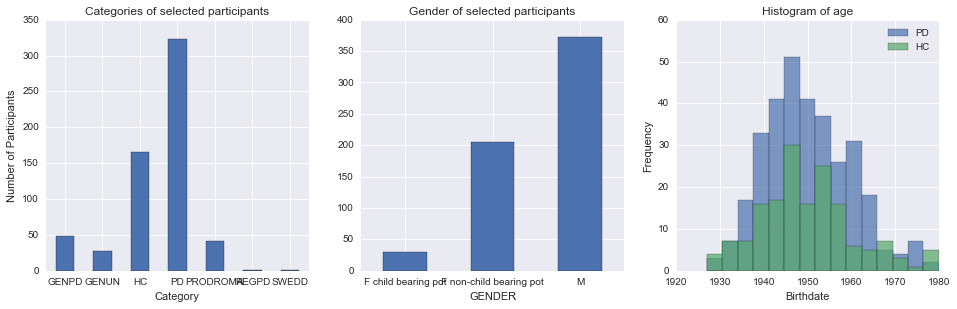

In [76]:
%matplotlib inline
plt.figure(1, figsize=(16, 4.5))

# plot the categories distribution
plt.subplot(1,3,1)
plot_1 = data_visits["info"].ENROLL_CAT.reset_index().groupby("ENROLL_CAT").size().plot(kind='bar', title="Categories of selected participants", rot=0, ax=plt.gca())
plot_1.set_ylabel("Number of Participants"); plot_1.set_xlabel("Category");

# plot the gender distribution
plt.subplot(1,3,2)
data_visits["info"].GENDER.replace([0, 1, 2], ['F child bearing pot', 'F non-child bearing pot', 'M']).reset_index().groupby("GENDER").size().plot(kind='bar', title="Gender of selected participants", rot=0, ax=plt.gca());

# plot the age histogram
plt.subplot(1,3,3)
hc_birthdt = data_visits["info"].BIRTHDT.reset_index()[data_visits["info"].reset_index()['ENROLL_CAT'] == 'HC'].rename(columns={'BIRTHDT':'HC'})
pd_birthdt = data_visits["info"].BIRTHDT.reset_index()[data_visits["info"].reset_index()['ENROLL_CAT'] == 'PD'].rename(columns={'BIRTHDT':'PD'})
concat_birthdt = pd.concat([pd_birthdt.PD, hc_birthdt.HC], axis=1)
plot_3 = concat_birthdt.plot(kind='hist', title="Histogram of age", alpha=0.7, bins=15, ax=plt.gca())
plot_3.set_xlabel("Birthdate");

In [77]:
data_visits["info"].ENROLL_CAT.reset_index().groupby("ENROLL_CAT").size()


ENROLL_CAT
GENPD        49
GENUN        28
HC          165
PD          323
PRODROMA     41
REGPD         1
SWEDD         1
dtype: int64

In [78]:
data_visits["info"].GENDER.reset_index()[data_visits["info"].reset_index()['ENROLL_CAT'] == 'PD'].replace([0, 1, 2], ['F child bearing pot', 'F non-child bearing pot', 'M']).reset_index().groupby("GENDER").size()

GENDER
F child bearing pot         19
F non-child bearing pot     93
M                          211
dtype: int64

In [79]:
t1 = data_visits['updrs1'].drop('INFODT',axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t2 = data_visits['updrs1pq'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t3 = data_visits['updrs2pq'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t4 = data_visits['updrs3'].drop(['PAG_NAME','CMEDTM','EXAMTM','PD_MED_USE','ON_OFF_DOSE','ANNUAL_TIME_BTW_DOSE_NUPDRS'],axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t5 = data_visits['epworth'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t6 = data_visits['moca'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t7 = data_visits['benton'].drop_duplicates(['PATNO','EVENT_ID'], keep='first').set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t8 = data_visits['neuro_cranial'][data_visits['neuro_cranial'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t9 = data_visits['geriatric'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t10 = data_visits['hopkins_verbal'][data_visits['hopkins_verbal'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t11 = data_visits['letter_seq'][data_visits['letter_seq'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t12 = data_visits['quip'][data_visits['quip'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t13 = data_visits['rem'][data_visits['rem'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t14 = data_visits['aut'][data_visits['aut'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t15 = data_visits['semantic'][data_visits['semantic'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t16 = data_visits['stai'][data_visits['stai'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t17 = data_visits['sdm'][data_visits['sdm'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')


In [80]:
## ones with high number being better:
# moca, benton, hopkins_verbal, letter_seq, semantic

## The following will be added only for PD analysis 
# only PD
# t10 = data_visits['updrs3a'].drop(['PAG_NAME','CMEDTM','EXAMTM','PD_MED_USE','ON_OFF_DOSE','ANNUAL_TIME_BTW_DOSE_NUPDRS'],axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
# t11 = data_visits['updrs4'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
# t12 = data_visits['schwab'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)

# chores
# t15 = data_visits['pase_house'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)

M = pd.concat([t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13, t14, t15, t16, t17], axis=1).interpolate(method='linear', axis=1, limit=10, limit_direction='both')


# normalize values based on z-score
data_visits_zs = {}
for i in range(1, len(datasets_of_interest) + 1):
    dataset = 't' + str(i)
    dataset_columns = eval(dataset).columns.levels[0][0:-1]
    
    # create an empty dataframe: t16_zs = pd.DataFrame(index=t16.index, columns=t16.columns)
    data_visits_zs[dataset] = pd.DataFrame(index=eval(dataset).index, columns=eval(dataset).columns)
    
    for col in dataset_columns:
        # assign normalized: t16_zs['a_state'] = (t16['a_state'] - t16['a_state'].mean().mean()) / t16['a_state'].stack().std()
        data_visits_zs[dataset][col] = (eval(dataset)[col] - eval(dataset)[col].mean().mean()) / eval(dataset)[col].stack().std()


# construct full M
M_zs = pd.concat([data_visits_zs['t1'], data_visits_zs['t2'], data_visits_zs['t3'], data_visits_zs['t4'], 
                  data_visits_zs['t5'], data_visits_zs['t6'] , data_visits_zs['t7'], data_visits_zs['t8'], 
                  data_visits_zs['t9'], data_visits_zs['t10'], data_visits_zs['t11'], data_visits_zs['t12'], 
                  data_visits_zs['t13'], data_visits_zs['t14'], data_visits_zs['t15'],data_visits_zs['t16'],
                  data_visits_zs['t17']], axis=1).interpolate(method='linear', axis=1, limit=10, limit_direction='both')


In [81]:
# normalize values based on min-max
data_visits_minmax = {}
minmax_min = {}
minmax_max = {}
for i in range(1, len(datasets_of_interest) + 1):
    dataset = 't' + str(i)
    dataset_columns = eval(dataset).columns.levels[0][0:-1]
    
    # create an empty dataframe: t16_zs = pd.DataFrame(index=t16.index, columns=t16.columns)
    data_visits_minmax[dataset] = pd.DataFrame(index=eval(dataset).index, columns=eval(dataset).columns)
    minmax_min[dataset] = pd.DataFrame(index=[1], columns=eval(dataset).columns)
    minmax_max[dataset] = pd.DataFrame(index=[1], columns=eval(dataset).columns)
    
    for col in dataset_columns:
        # assign normalized: t16_zs['a_state'] = (t16['a_state'] - t16['a_state'].min().min()) / (df.max() - df.min())
        data_visits_minmax[dataset][col] = (eval(dataset)[col] - eval(dataset)[col].min().min()) / (eval(dataset)[col].max().max() - eval(dataset)[col].min().min() )
        minmax_min[dataset][col] = eval(dataset)[col].min().min()
        minmax_max[dataset][col] = eval(dataset)[col].max().max()
    

# construct full M
M_minmax = pd.concat([data_visits_minmax['t1'], data_visits_minmax['t2'], data_visits_minmax['t3'], data_visits_minmax['t4'], 
                  data_visits_minmax['t5'], data_visits_minmax['t6'] , data_visits_minmax['t7'], data_visits_minmax['t8'], 
                  data_visits_minmax['t9'], data_visits_minmax['t10'], data_visits_minmax['t11'], data_visits_minmax['t12'], 
                  data_visits_minmax['t13'], data_visits_minmax['t14'], data_visits_minmax['t15'],data_visits_minmax['t16'],
                  data_visits_minmax['t17']], axis=1).interpolate(method='linear', axis=1, limit=10, limit_direction='both')

# construct min array for export
M_minmax_min = pd.concat([minmax_min['t1'], minmax_min['t2'], minmax_min['t3'], minmax_min['t4'], 
                  minmax_min['t5'], minmax_min['t6'] , minmax_min['t7'], minmax_min['t8'], 
                  minmax_min['t9'], minmax_min['t10'], minmax_min['t11'], minmax_min['t12'], 
                  minmax_min['t13'], minmax_min['t14'], minmax_min['t15'],minmax_min['t16'],
                  minmax_min['t17']], axis=1)

M_minmax_max = pd.concat([minmax_max['t1'], minmax_max['t2'], minmax_max['t3'], minmax_max['t4'], 
                  minmax_max['t5'], minmax_max['t6'] , minmax_max['t7'], minmax_max['t8'], 
                  minmax_max['t9'], minmax_max['t10'], minmax_max['t11'], minmax_max['t12'], 
                  minmax_max['t13'], minmax_max['t14'], minmax_max['t15'],minmax_max['t16'],
                  minmax_max['t17']], axis=1)

In [82]:
M_chosen = M_minmax #M_zs #M # choosing Min-Max normalized data withh all features

M_cat = pd.concat([M_chosen, data_visits["info"].ENROLL_CAT], axis=1) # labels of selected subjects

M_W_columns = ['PCA_1', 'PCA_2', 'PCA_3', 'ICA_1', 'ICA_2', 'NMF_2_1', 'NMF_2_2', 
               'NMF_3_1', 'NMF_3_2', 'NMF_3_3']
M_W = pd.DataFrame(index=M_chosen.index, columns=M_W_columns)

# PCA
from sklearn.decomposition import PCA as sklearnPCA
model_pca = sklearnPCA(n_components=3)
M_W[['PCA_1', 'PCA_2', 'PCA_3']] = model_pca.fit_transform(M_chosen)

# NMF
from sklearn import decomposition
model_NMF = decomposition.NMF(n_components=2, init='nndsvda', max_iter=200)
model_NMF3 = decomposition.NMF(n_components=3, init='nndsvda', max_iter=200)
M_W[['NMF_2_1', 'NMF_2_2']] = model_NMF.fit_transform(M_chosen)
M_W[['NMF_3_1', 'NMF_3_2', 'NMF_3_3']] = model_NMF3.fit_transform(M_chosen)

# ICA
model_ICA = decomposition.FastICA(n_components=2)
M_W[['ICA_1', 'ICA_2']] = model_ICA.fit_transform(M_chosen)



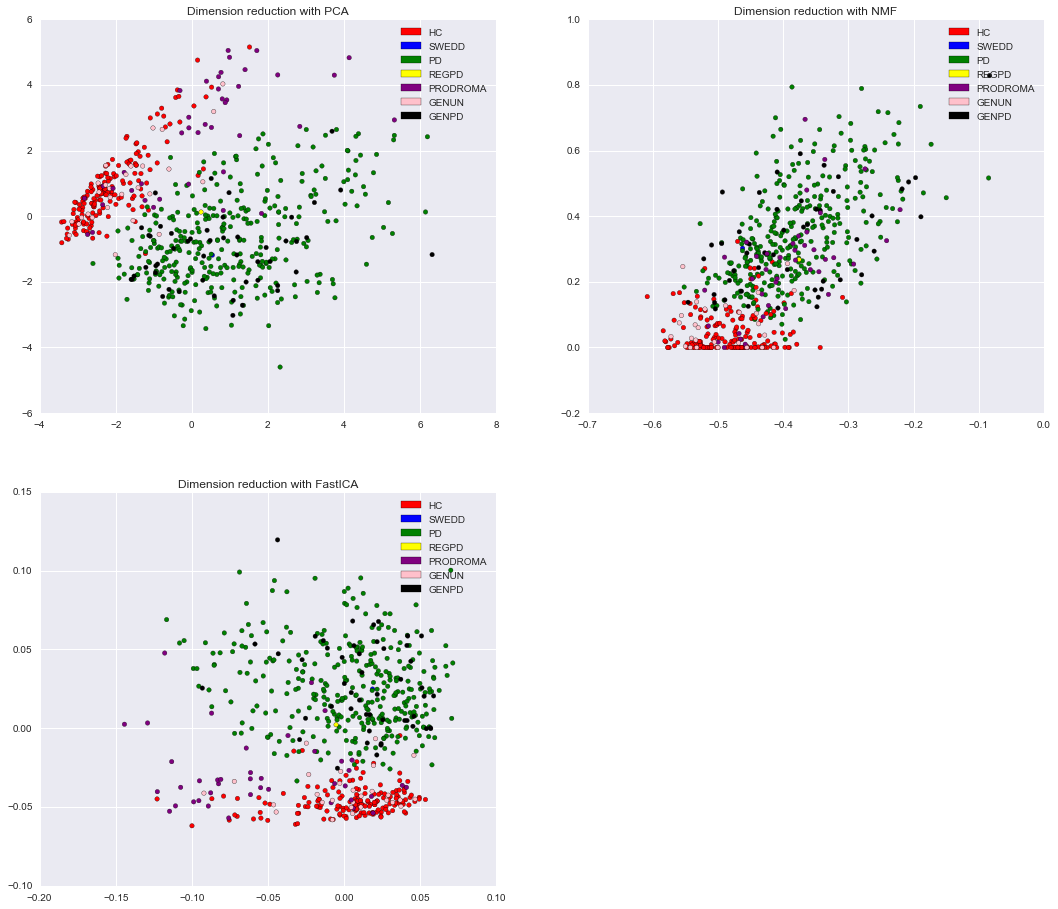

In [83]:
# plot the dimension reduction color makrked with participants' "categories", and "gender"
%matplotlib inline
plt.figure(1, figsize=(18, 24))

## PCA 
plt.subplot(3,2,1)
colors_categories = data_visits["info"].ENROLL_CAT.replace(['HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'], ['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'black'])

plot_1 = plt.scatter(M_W[['PCA_1']], M_W[['PCA_2']], c = colors_categories)

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p5 = plt.Rectangle((0, 0), 0.1, 0.1, fc='purple')
p6 = plt.Rectangle((0, 0), 0.1, 0.1, fc='pink')
p7 = plt.Rectangle((0, 0), 0.1, 0.1, fc='black')
plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');
plt.title('Dimension reduction with PCA')


## NMF 
plt.subplot(3,2,2)
colors_categories = data_visits["info"].ENROLL_CAT.replace(['HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'], ['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'black'])

plot_1 = plt.scatter(-M_W[['NMF_2_1']], M_W[['NMF_2_2']], c = colors_categories)

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p5 = plt.Rectangle((0, 0), 0.1, 0.1, fc='purple')
p6 = plt.Rectangle((0, 0), 0.1, 0.1, fc='pink')
p7 = plt.Rectangle((0, 0), 0.1, 0.1, fc='black')
plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');
plt.title('Dimension reduction with NMF')
# plt.plot([0.3,0.6], [0,0.5])
# plt.plot([0.2,0.5], [0.1,0.6])

## ICA
plt.subplot(3,2,3)
colors_categories = data_visits["info"].ENROLL_CAT.replace(['HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'], ['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'black'])

plot_1 = plt.scatter(M_W[['ICA_1']], M_W[['ICA_2']], c = colors_categories)

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p5 = plt.Rectangle((0, 0), 0.1, 0.1, fc='purple')
p6 = plt.Rectangle((0, 0), 0.1, 0.1, fc='pink')
p7 = plt.Rectangle((0, 0), 0.1, 0.1, fc='black')
plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');
plt.title('Dimension reduction with FastICA')

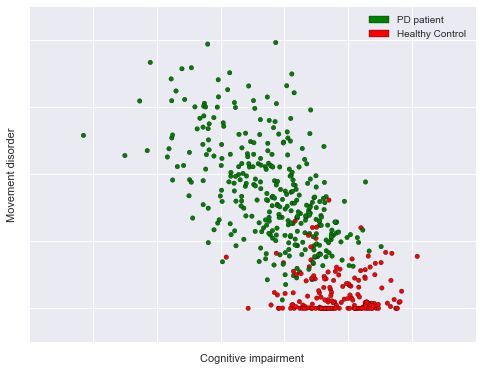

In [84]:
## NMF 
%matplotlib inline
plt.figure(1, figsize=(8, 6))

M_W_select = M_W.loc[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ]
plt.scatter(M_W_select[['NMF_2_1']], M_W_select[['NMF_2_2']], c = colors_categories[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ])

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')

plt.legend((p3, p1), ('PD patient','Healthy Control'), loc='best');
#plt.title('Dimension reduction with NMF')

plt.grid(True)
ax = plt.axes()
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel('Cognitive impairment')
ax.set_ylabel('Movement disorder')
# ax.set_zlabel('Sleep disorder')

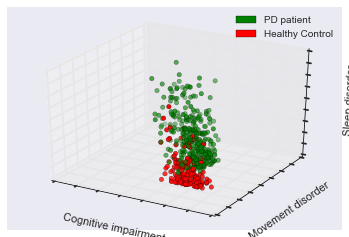

In [85]:
# NMF 3 color makrked with participants' "categories"
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

# plots all
# ax.scatter(M_W[['NMF_3_1']], M_W[['NMF_3_2']], M_W[['NMF_3_3']], c = colors_categories)
# plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');

# plots onlt PD and HC
M_W_PD_HC = M_W.loc[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ]
ax.scatter(M_W_PD_HC[['NMF_3_1']], M_W_PD_HC[['NMF_3_2']], M_W_PD_HC[['NMF_3_3']], c = colors_categories[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ])


plt.legend((p3, p1), ('PD patient','Healthy Control' ), loc='best');

ax.grid(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Cognitive impairment')
ax.set_ylabel('Movement disorder')
ax.set_zlabel('Sleep disorder')

ERROR: Line magic function `%matpltlib` not found.


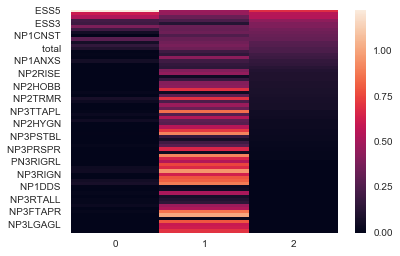

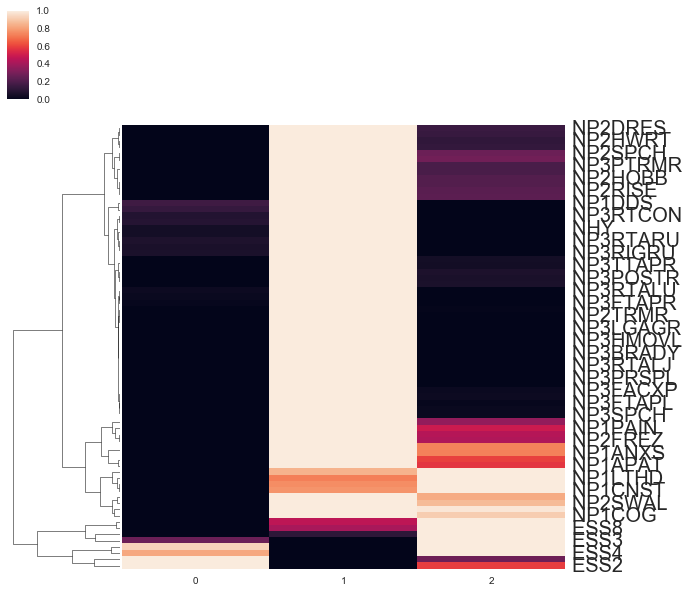

In [86]:
import seaborn as sns
%matplotlib inline
# M_W[['NMF_3_1', 'NMF_3_2', 'NMF_3_3']] = model_NMF3.fit_transform(M_chosen)
model_NMF3.fit_transform(M_chosen)
# M_W_PD_HC[['NMF_3_1']], M_W_PD_HC[['NMF_3_2']], M_W_PD_HC[['NMF_3_3']]
H = model_NMF3.components_

H_columns = M_chosen.columns
M_H = pd.DataFrame(data=H, columns=H_columns)
# M_H.loc[]= 
M_H 
# M_H.loc[0] = H[0,:]
# M_H.loc[1] = H[1,:]
# M_H.loc[2] = H[2,:]
M_H = M_H.iloc[:, M_H.columns.get_level_values(1)=='V03'] 
M_H.columns = [' '.join(col).strip().replace('V03','') for col in M_H.columns.values]
# M_H_T = M_H.T.sort([1],ascending=False)
M_H_T = M_H.T.sort_values(by=[2],ascending=False)
M_H_T
sns.heatmap(M_H_T)


a4_dims = (5, 30)
# fig, ax = plt.subplots(figsize=a4_dims)
# sns.heatmap(ax=ax, data=M_H_T )
# sns.clustermap(data=M_H_T, col_cluster=False, standard_scale=1)
cg = sns.clustermap(data=M_H_T, col_cluster=False, figsize=(10, 10), standard_scale=3)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=20);

In [87]:
model_NMF3.components_[0,:].sum() / (model_NMF3.components_.sum())

0.29477918907832096

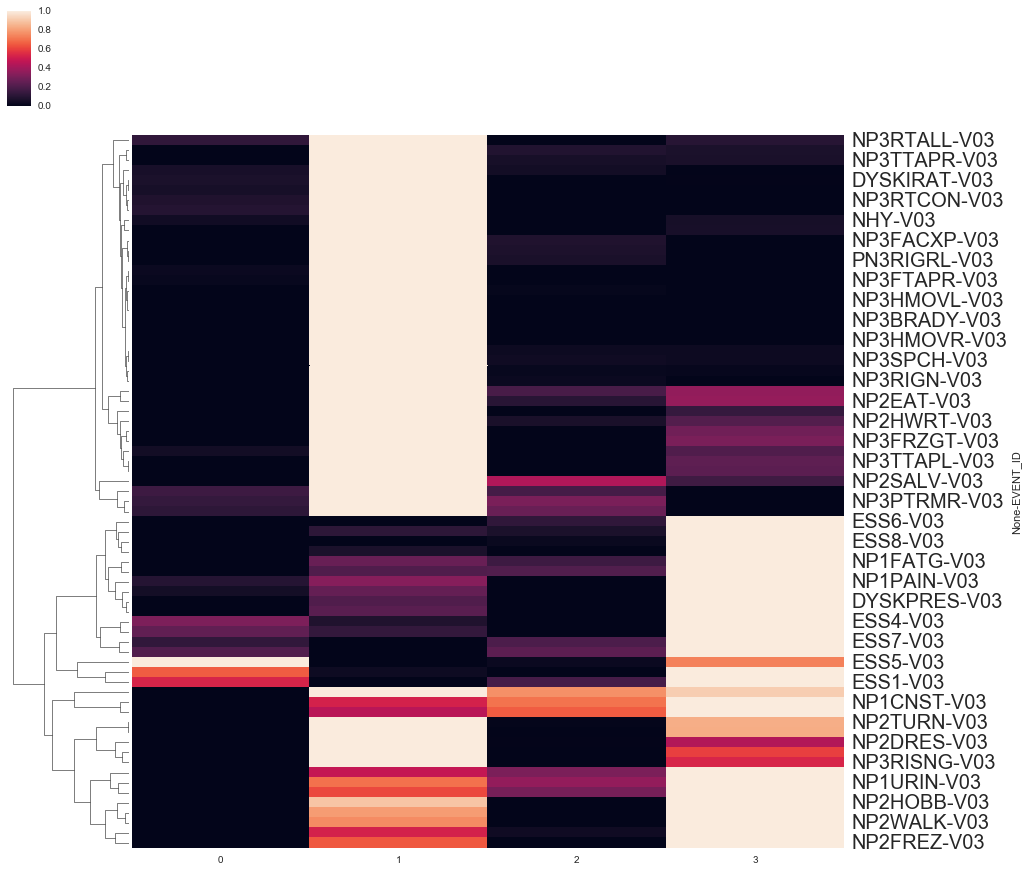

In [88]:

model_NMF4 = decomposition.NMF(n_components=4, init='nndsvda', max_iter=200)
model_NMF4.fit_transform(M_chosen)
H = model_NMF4.components_
H_columns = M_chosen.columns
M_H = pd.DataFrame(columns=H_columns)
M_H.loc[0] = H[0,:]
M_H.loc[1] = H[1,:]
M_H.loc[2] = H[2,:]
M_H.loc[3] = H[3,:]
M_H = M_H.iloc[:, M_H.columns.get_level_values(1)=='V03'] 
# M_H.columns = [' '.join(col).strip() for col in M_H.columns.values]
M_H_T = M_H.T.sort_values(by=[2],ascending=False)
M_H_T
cg = sns.clustermap(data=M_H_T.fillna(0), col_cluster=False, figsize=(15, 15), standard_scale=3)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=20);

In [89]:
model_NMF4.components_[2,:].sum()

114.66050616386102

In [90]:
# label HC as HC
M_label_columns = ['GMM']
M_label = pd.DataFrame(index=M_chosen.index, columns=M_label_columns)

M_label[ M_cat.ENROLL_CAT == "HC" ] = 'HC'
M_label[ M_cat.ENROLL_CAT == "SWEDD" ] = 'SWEDD'

# label PD using GMM
M_gmm_chosen = M_W[['NMF_2_1', 'NMF_2_2']] #M_W[['PCA_1', 'PCA_2']]
M_PD_gmm_chosen = M_gmm_chosen[ M_cat.ENROLL_CAT == "PD" ]
M_PD_HC_gmm_chosen = M_gmm_chosen[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ]
M_PD_HC_SWEDD_gmm_chosen = M_gmm_chosen[ M_cat.ENROLL_CAT.isin(['HC', 'PD', 'SWEDD']) ]

from sklearn import mixture
model_gmm = mixture.GaussianMixture(n_components=3, covariance_type='tied')
model_gmm.fit(M_PD_gmm_chosen) # print(gmm.means_)

# label the predicted and only keep HC and PDs
M_label.loc[ M_cat.ENROLL_CAT == "PD", 'GMM' ] = model_gmm.predict(M_PD_gmm_chosen)



##### Arranging the three vectors as per color

In [91]:
srt = np.empty((3,2))
for i in range(3):
    srt[i,1] = M_PD_HC_gmm_chosen.NMF_2_2[M_label.GMM == i].sum()/ len(M_label.GMM[M_label.GMM == i])
    srt[i,0] = i

srt = pd.DataFrame(srt).sort([1])

M_label.replace([srt.iloc[0,0],srt.iloc[1,0], srt.iloc[2,0] ],['PD_l', 'PD_m', 'PD_h'], inplace=True)
#M_label.replace([1,0,2],['PD_l', 'PD_m', 'PD_h'], inplace=True)
M_label_PD = M_label[ M_cat.ENROLL_CAT.isin(['PD']) ]
M_label_PD_HC = M_label[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ]
M_label_PD_HC_SWEDD = M_label[ M_cat.ENROLL_CAT.isin(['HC', 'PD', 'SWEDD']) ]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Stored 'model_gmm' (GaussianMixture)
Stored 'M_PD_HC_gmm_chosen' (DataFrame)


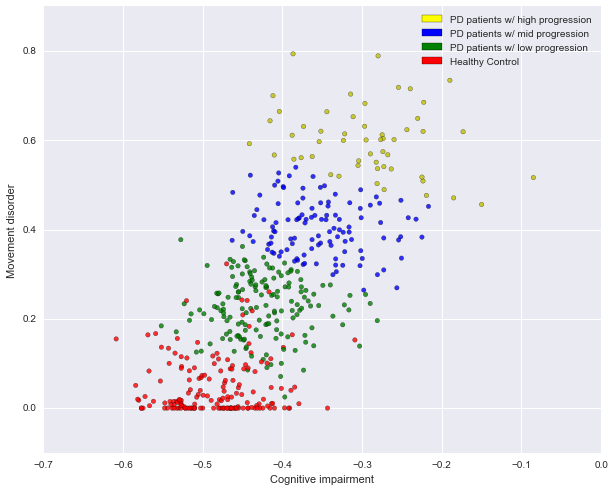

In [92]:


# plot only predicted PD
%matplotlib inline
# plt.figure(1, figsize=(20, 16))
# plt.subplot(2,2,1)
# colors = ['b' if i==0 else 'g' if i==1 else 'y' if i==2 else 'r' for i in model_gmm.predict(M_PD_gmm_chosen)]
# ax = plt.scatter(-M_PD_gmm_chosen[[0]], M_PD_gmm_chosen[[1]], c=colors, alpha=0.8)#gca()
# # ax.scatter(M_PD_gmm_chosen[[0]], M_PD_gmm_chosen[[1]], c=colors, alpha=0.8)
# p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
# p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
# p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
# plt.legend((p1, p2, p3), ('PD High', 'PD Mid', 'PD Low'), loc='best');
# plt.title('Labeling PD based on GMM')

# plot predicted PD and HC
# plt.subplot(2,2,2)
plt.figure(1, figsize=(10, 8))
colors = ['r' if i=='HC' else 'g' if i=='PD_l' else 'b' if i=='PD_m' else 'y' if i=='PD_h' else 'black' for i in M_label_PD_HC['GMM']]
ax = plt.scatter(-M_PD_HC_gmm_chosen.iloc[:,0], M_PD_HC_gmm_chosen.iloc[:,1], c=colors, alpha=0.8)#gca()
# ax.scatter(M_PD_HC_gmm_chosen[[0]], M_PD_HC_gmm_chosen[[1]], c=colors, alpha=0.8)
p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
plt.legend((p1, p2, p3, p4), ('PD patients w/ high progression', 'PD patients w/ mid progression', 'PD patients w/ low progression', 'Healthy Control'), loc='best');
# plt.title('Adding HC to the labeld PD')
# plt.axes().set_xticklabels([])
# plt.axes().set_yticklabels([])
plt.axes().set_xlabel('Cognitive impairment')
plt.axes().set_ylabel('Movement disorder')
# ax.set_zlabel('Sleep disorder')


%store model_gmm
%store M_PD_HC_gmm_chosen

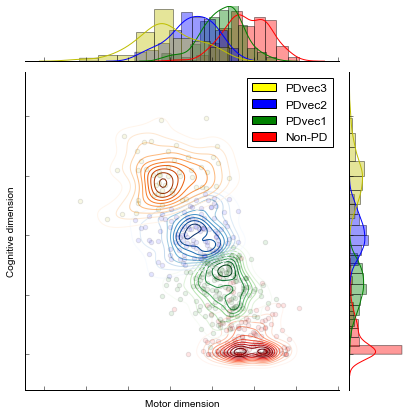

In [94]:
import matplotlib as mpl
mpl.style.use('default')
%matplotlib inline

x_hc = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['HC']),'NMF_2_1']
y_hc = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['HC']),'NMF_2_2']

x_pd_l = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['PD_l']),'NMF_2_1']
y_pd_l = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['PD_l']),'NMF_2_2']

x_pd_m = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['PD_m']),'NMF_2_1']
y_pd_m = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['PD_m']),'NMF_2_2']

x_pd_h = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['PD_h']),'NMF_2_1']
y_pd_h = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['PD_h']),'NMF_2_2']

plt.ion()
plt.show()
plt.pause(0.001)
a = 0.1
l = 10
zo = 0

p = sns.JointGrid(x = x_hc, y = y_hc)
p = p.plot_joint(plt.scatter, c="R", alpha = a)
# p.ax_marg_x.hist(-x_hc, alpha = 0.5, color='r')
# p.ax_marg_y.hist(y_hc, orientation = 'horizontal', alpha = 0.5, color='r')
p.plot_marginals(sns.distplot, color='r', axlabel=[])
p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Reds")

p.x = x_pd_l
p.y = y_pd_l
p.plot_joint(plt.scatter, c="g", alpha = a)
p.plot_marginals(sns.distplot, color='g', axlabel=[])
p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Greens")

p.x = x_pd_m
p.y = y_pd_m
p.plot_joint(plt.scatter, c="b", alpha = a)
p.plot_marginals(sns.distplot, color='b', axlabel=[])
p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Blues")

p.x = x_pd_h
p.y = y_pd_h
p.plot_joint(plt.scatter, c="y", alpha = a)
p.plot_marginals(sns.distplot, color='y', axlabel=[])
p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Oranges")

p.set_axis_labels(xlabel='Motor dimension', ylabel='Cognitive dimension')
p.ax_joint.set_xticklabels([])
p.ax_joint.set_yticklabels([])
# p.ax_marg_x.legend_.remove()

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
plt.legend((p1, p2, p3, p4), ('PDvec3', 'PDvec2', 'PDvec1', 'Non-PD'), loc='best',prop={'size':12});

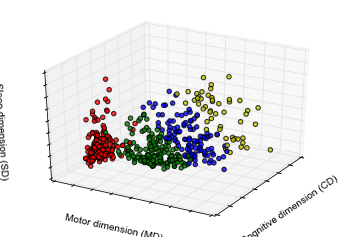

In [95]:
# NMF 3 color makrked with participants' "categories"
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
%matplotlib inline
mpl.style.use('seaborn-colorblind')
ax = plt.axes(projection='3d')

# plots all
# ax.scatter(M_W[['NMF_3_1']], M_W[['NMF_3_2']], M_W[['NMF_3_3']], c = colors_categories)
# plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');

# plots onlt PD and HC
# colors = ['r' if i=='HC' else 'g' if i=='PD_l' else 'b' if i=='PD_m' else 'y' if i=='PD_h' else 'black' for i in M_label_PD_HC['GMM']]
# ax = plt.scatter(-M_PD_HC_gmm_chosen[[0]], M_PD_HC_gmm_chosen[[1]], c=colors, alpha=0.8)#gca()


M_W_PD_HC = M_W.loc[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ]
ax.scatter(M_W_PD_HC[['NMF_3_1']], M_W_PD_HC[['NMF_3_2']], M_W_PD_HC[['NMF_3_3']], c = colors, alpha=0.8)
p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
# plt.legend((p1, p2, p3, p4), ('PDvec3', 'PDvec2', 'PDvec1', 'Non-PD'), loc='best',prop={'size':12});

ax.grid(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Cognitive dimension (CD)')
ax.set_ylabel('Motor dimension (MD)')
ax.set_zlabel('Sleep dimension (SD)')


# defult: elev = 30, -60 degree
ax.view_init(elev=30., azim=30)
# ax.view_init(elev=90, azim=0)

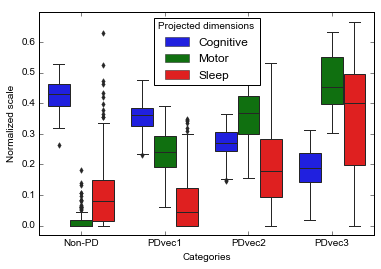

In [96]:
mpl.style.use('default')
M_boxbar = M_W[['NMF_3_1','NMF_3_2','NMF_3_3']]
M_boxbar.columns = ['Cognitive', 'Motor', 'Sleep']
M_boxbar = pd.concat([M_label_PD_HC.replace(['HC','PD_l', 'PD_m', 'PD_h'] , 
                                            ['Non-PD','PDvec1', 'PDvec2', 'PDvec3'])
                      , M_boxbar], axis=1, join='inner')
# M_boxbar['Cognitive impairment'] = -M_boxbar['Cognitive impairment']

a = M_boxbar.reset_index().set_index(['PATNO','GMM']).stack().reset_index().set_index('PATNO')
a.columns = ['Categories', 'Projected dimensions', 'Normalized scale']
a['Normalized scale'] = a['Normalized scale'].apply(pd.to_numeric)

# plot
%matplotlib inline
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(sharey=True)
ax.set(ylim=(-0.03, 0.7))
cg = sns.boxplot(x="Categories", y="Normalized scale", hue="Projected dimensions", data=a, fliersize=4, ax=ax);

# alternative plot
# g = sns.FacetGrid(col="GMM", data=a);
# g = g.map(sns.boxplot, "hue", "value")

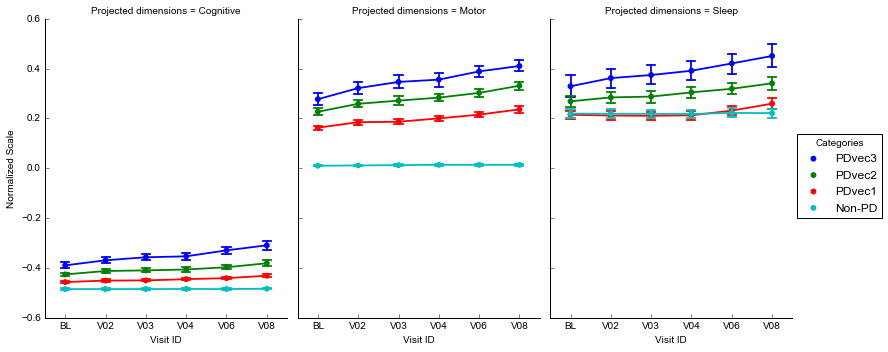

In [97]:
from sklearn.cluster import KMeans
mpl.style.use('default')
%matplotlib inline
# Clustering columns
M_H.T.sort_values(by=[0],ascending=False).head(11)
M_H_T = M_H.T.sort_values(by=[1],ascending=False)

kmeans = KMeans(n_clusters=3, random_state=0).fit(M_H_T)

# Columns 
cog_cols = M_H_T[kmeans.labels_ == 2].index.values.tolist()
mov_cols = M_H_T[kmeans.labels_ == 1].index.values.tolist()
sleep_cols = M_H_T[kmeans.labels_ == 0].index.values.tolist()

cog_cols = np.char.strip(cog_cols)[:,0]#[3:5]
cog_cols = np.delete(cog_cols, [1,5,8]) #  remove ones with reverse direction 1,5,6,7 // ESS5 // attention, visuospatial
mov_cols = np.char.strip(mov_cols)[:,0]
sleep_cols = np.char.strip(sleep_cols)[:,0]

M_cog = M_chosen.loc[:, M_chosen.columns.get_level_values(0).isin(cog_cols)].stack()#.reset_index().set_index('PATNO')
M_mov = M_chosen.loc[:, M_chosen.columns.get_level_values(0).isin(mov_cols)].stack()#.reset_index().set_index('PATNO')
M_sleep = M_chosen.loc[:, M_chosen.columns.get_level_values(0).isin(sleep_cols)].stack()#.reset_index().set_index('PATNO')

a = pd.concat([M_cog.mean(axis=1)-0.5, M_mov.mean(axis=1), M_sleep.mean(axis=1)], axis=1, join='inner') # normalize scale 
# a = pd.concat([M_cog.mean(axis=1), M_mov.mean(axis=1), M_sleep.mean(axis=1)], axis=1, join='inner')
a.columns = ['Cognitive', 'Motor', 'Sleep']
a = a.stack().reset_index().set_index("PATNO")
b = pd.concat([M_label_PD_HC.replace(['HC','PD_l', 'PD_m', 'PD_h'] , 
                                            ['Non-PD','PDvec1', 'PDvec2', 'PDvec3'])
                      , a], axis=1, join_axes=[a.index])
b.columns = ['Categories', 'Visit ID', 'Projected dimensions', 'Normalized Scale']
# plot
# https://seaborn.pydata.org/examples/pointplot_anova.html
%matplotlib inline
a4_dims = (11.7, 8.27)
g = sns.factorplot(x="Visit ID", y='Normalized Scale', hue="Categories", col='Projected dimensions', data=b,
                   hue_order =['PDvec3', 'PDvec2', 'PDvec1', 'Non-PD'],
                   capsize=0.2,  size=5, aspect=.75)

# g.despine(left=True)

In [98]:
X_clinical = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1)=='BL'] 
X_clinical = X_clinical.stack().reset_index().set_index('PATNO').drop('EVENT_ID',1)
Y_clinical = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

X_train, X_test, Y_train, Y_test = train_test_split(X_clinical, Y_clinical, test_size=0.2, random_state=42)


n_classes = len(Y_test.unique())
fpr = dict()
tpr = dict()
roc_auc = dict()

mean_tpr = dict()
mean_fpr = dict()
mean_auc = dict()

cv = StratifiedKFold(n_splits=5)
lr = LogisticRegression()



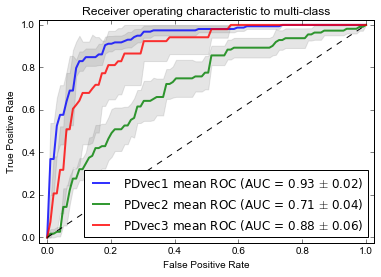

In [99]:
%matplotlib inline
for k in range(n_classes):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for train, test in cv.split(X_clinical, Y_clinical):
        preds = lr.fit(X_clinical.iloc[train], Y_clinical.iloc[train]).predict_proba(X_clinical.iloc[test])[:,k]
        label = [1 if int(j) == (k+2) else 0 for j in Y_clinical.iloc[test]] #2,3,4
        fpr, tpr, _ = metrics.roc_curve(label, preds)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        i += 1
    
    class_name = 'PDvec1' if k+2==2 else 'PDvec2' if k+2==3 else 'PDvec3' if k+2==4 else 'SWEDD' if k+2==5 else 'NA'
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr,
             label=r'{0} mean ROC (AUC = {1:0.2f} $\pm$ {2:0.2f})'.format(class_name, mean_auc, std_auc),
             lw=2, alpha=.8)
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2)
    
plt.figure(1, figsize=(9, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.025, 1.025])
plt.ylim([-0.025, 1.025])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [100]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = pd.read_csv(url, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]

X = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1)=='BL'] 
# X.columns = [' '.join(col).strip() for col in X.columns.values]
Y = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 54) # the magic number of features 
rfe_fit = rfe.fit(X, Y)
print("Num Features:", rfe_fit.n_features_)
print("Selected Features: ", rfe_fit.support_)
print("Feature Ranking: ", rfe_fit.ranking_)
BL_features = X.columns.get_level_values(0)[rfe_fit.support_]
X.columns.get_level_values(0)[rfe_fit.support_]
# X.columns.get_level_values(0)


Num Features: 54
Selected Features:  [False False False False False False  True  True  True False  True False
 False False False False  True  True False  True False False False False
  True False  True  True  True  True False False  True False  True  True
  True False  True  True  True False  True  True False False False  True
  True False  True  True  True False False False False False False False
 False False False False False False False False False False False  True
 False  True  True  True False  True False False False  True False False
 False False False False False  True  True False False  True False False
 False False False  True  True False False False False  True  True False
 False  True False False  True  True  True  True False  True False  True
 False False False False  True  True False  True  True False False False
 False False  True False  True False  True  True]
Feature Ranking:  [69 33 27 18 31 81  1  1  1 51  1 72 65 76 16 47  1  1 28  1 49 58 55 23  1
 10  1  1  1  1 

Index(['NP1SLPN', 'NP1SLPD', 'NP1PAIN', 'NP1CNST', 'NP2EAT', 'NP2DRES',
       'NP2HWRT', 'NP2WALK', 'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU',
       'NP3RIGLL', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPL', 'NP3TTAPR',
       'NP3TTAPL', 'NP3LGAGL', 'NP3RISNG', 'NP3POSTR', 'NP3BRADY', 'NP3PTRML',
       'NP3KTRMR', 'NP3KTRML', 'naming', 'language', 'delayed_recall',
       'MCAABSTR', 'MCATOT', 'CN346RSP', 'HVLTRT1', 'HVLTRT2', 'HVLTREC',
       'TMSEX', 'CNTRLSEX', 'TMTORACT', 'TMTMTACT', 'DRMAGRAC', 'SLPINJUR',
       'DRMVERBL', 'DRMFIGHT', 'DRMUMV', 'MVAWAKEN', 'SLPDSTRB', 'DEPRS',
       'EPILEPSY', 'gastrointestinal_up', 'gastrointestinal_down', 'VLTANIM',
       'VLTFRUIT', 'a_trait', 'SDMTOTAL'],
      dtype='object')

'''
baseline only
'''

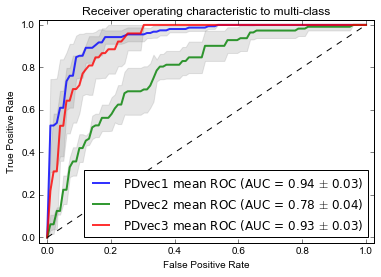

In [101]:
X_rfe = X.ix[:,X.columns.get_level_values(0)[rfe_fit.support_]]

# X_rfe = X_rfe.stack().reset_index().set_index('PATNO').drop('EVENT_ID',1)
X_rfe
Y_rfe = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

X_train, X_test, Y_train, Y_test = train_test_split(X_rfe, Y_rfe, test_size=0.2, random_state=42)


n_classes = len(Y_test.unique())
fpr = dict()
tpr = dict()
roc_auc = dict()

mean_tpr = dict()
mean_fpr = dict()
mean_auc = dict()

cv = StratifiedKFold(n_splits=5)
lr = LogisticRegression()

for k in range(n_classes):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for train, test in cv.split(X_rfe, Y_rfe):
        preds = lr.fit(X_rfe.iloc[train], Y_rfe.iloc[train]).predict_proba(X_rfe.iloc[test])[:,k]
        label = [1 if int(j) == (k+2) else 0 for j in Y_rfe.iloc[test]] #2,3,4
        fpr, tpr, _ = metrics.roc_curve(label, preds)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        i += 1
    
    class_name = 'PDvec1' if k+2==2 else 'PDvec2' if k+2==3 else 'PDvec3' if k+2==4 else 'SWEDD' if k+2==5 else 'NA'
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr,
             label=r'{0} mean ROC (AUC = {1:0.2f} $\pm$ {2:0.2f})'.format(class_name, mean_auc, std_auc),
             lw=2, alpha=.8)
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2)

plt.figure(1, figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.025, 1.025])
plt.ylim([-0.025, 1.025])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [102]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = pd.read_csv(url, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]

X = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1).isin(['BL', 'V02'])] 
X.columns = [' '.join(col).strip() for col in X.columns.values]

Y = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 73) # the magic number of features 
rfe_fit = rfe.fit(X, Y)
print("Num Features:", rfe_fit.n_features_)
print("Selected Features: ", rfe_fit.support_)
print("Feature Ranking: ", rfe_fit.ranking_)
BL_year1_features = X.columns.get_level_values(0)[rfe_fit.support_]
X.columns.get_level_values(0)[rfe_fit.support_]
# X.columns.get_level_values(0)

Num Features: 73
Selected Features:  [False False False False False False False False False False False False
  True False  True  True  True  True False False False  True False False
 False False False False False  True False False False  True False  True
 False False False  True False False False  True False False False False
 False  True False False  True False  True  True False  True False False
 False  True False  True False False False  True False  True False  True
 False  True False False  True  True False  True False  True False  True
 False False False False False False False False False  True  True  True
  True False False False False False  True  True  True  True False False
  True  True False False False False False False False False False False
 False False False False False False False False False  True  True False
 False False False False False False False False False  True  True  True
  True  True False  True False False False False False False False False
 False False F

Index(['NP1SLPN BL', 'NP1SLPD BL', 'NP1SLPD V02', 'NP1PAIN BL', 'NP1PAIN V02',
       'NP1CNST V02', 'NP2SALV V02', 'NP2EAT V02', 'NP2DRES V02',
       'NP2HWRT V02', 'NP2TURN V02', 'NP2WALK V02', 'NP3SPCH BL',
       'NP3FACXP BL', 'NP3FACXP V02', 'NP3RIGN V02', 'NP3RIGLU V02',
       'PN3RIGRL V02', 'NP3FTAPR V02', 'NP3FTAPL V02', 'NP3HMOVR V02',
       'NP3HMOVL V02', 'NP3PRSPL BL', 'NP3PRSPL V02', 'NP3TTAPR V02',
       'NP3TTAPL V02', 'NP3LGAGR V02', 'NP3PSTBL V02', 'NP3POSTR BL',
       'NP3POSTR V02', 'NP3BRADY BL', 'NP3KTRMR BL', 'NP3KTRMR V02',
       'NP3KTRML BL', 'NP3KTRML V02', 'NP3RTALU BL', 'NP3RTALU V02',
       'ESS3 V02', 'ESS4 BL', 'naming BL', 'attention BL', 'language BL',
       'delayed_recall BL', 'MCAABSTR BL', 'MCATOT BL', 'HVLTRT1 BL',
       'HVLTRT3 BL', 'HVLTRDLY BL', 'HVLTREC BL', 'LNS_TOTRAW BL', 'TMSEX BL',
       'CNTRLSEX BL', 'TMTORACT BL', 'TMTMTACT BL', 'DRMAGRAC BL',
       'DRMAGRAC V02', 'SLPLMBMV V02', 'SLPINJUR V02', 'DRMVERBL V02',
       'DR

'''
baseline + 1 year
'''

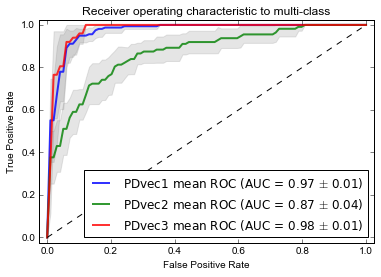

In [103]:
X_rfe = X.ix[:,X.columns.get_level_values(0)[rfe_fit.support_]]

# X_rfe = X_rfe.stack().reset_index().set_index('PATNO').drop('EVENT_ID',1)
X_rfe
Y_rfe = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

X_train, X_test, Y_train, Y_test = train_test_split(X_rfe, Y_rfe, test_size=0.2, random_state=42)


n_classes = len(Y_test.unique())
fpr = dict()
tpr = dict()
roc_auc = dict()

mean_tpr = dict()
mean_fpr = dict()
mean_auc = dict()

cv = StratifiedKFold(n_splits=5)
lr = LogisticRegression()

for k in range(n_classes):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for train, test in cv.split(X_rfe, Y_rfe):
        preds = lr.fit(X_rfe.iloc[train], Y_rfe.iloc[train]).predict_proba(X_rfe.iloc[test])[:,k]
        label = [1 if int(j) == (k+2) else 0 for j in Y_rfe.iloc[test]] #2,3,4
        fpr, tpr, _ = metrics.roc_curve(label, preds)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        i += 1
    
    class_name = 'PDvec1' if k+2==2 else 'PDvec2' if k+2==3 else 'PDvec3' if k+2==4 else 'SWEDD' if k+2==5 else 'NA'
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr,
             label=r'{0} mean ROC (AUC = {1:0.2f} $\pm$ {2:0.2f})'.format(class_name, mean_auc, std_auc),
             lw=2, alpha=.8)
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2)

plt.figure(1, figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.025, 1.025])
plt.ylim([-0.025, 1.025])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

